In [52]:
# import some basic package
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [53]:
# read the csv file in to dataframe. Read four days
df1 = pd.read_csv("./data/Day1.csv",header = 0,sep = ',')
df2 = pd.read_csv("./data/Day2.csv",header = 0,sep = ',')
df3 = pd.read_csv("./data/Day3.csv",header = 0,sep = ',')
df4 = pd.read_csv("./data/Day4.csv",header = 0,sep = ',')

In [54]:
## structurelize the data for further usage (matrixlize the data & data completion);
# n: dataset size; d: dimension
Data1 = df1.values
Data2 = df2.values
Data3 = df3.values
Data4 = df4.values
Data = np.vstack((Data1,Data2,Data3,Data4))
# get rid of first line: the time
Data = np.delete(Data, 0, axis=1)
n = Data.shape[0]
d = Data.shape[1]

# complete the dataset:
# principle: in the next line, if there is a nan, 
# keep the value same as the last line within same column
for i in range(n):
    for j in range(d):
        if math.isnan(Data[i,j]):
            Data[i,j] = Data[i-1,j]

In [55]:
# n: dataset size; d: dimension

# I: Print out the overall price trend of stock

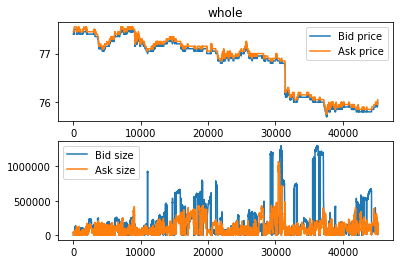

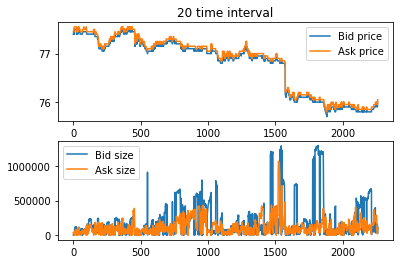

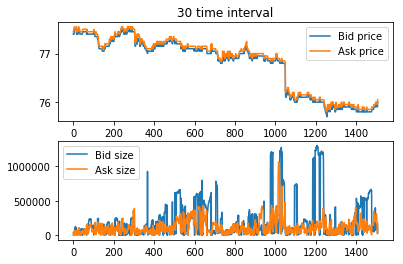

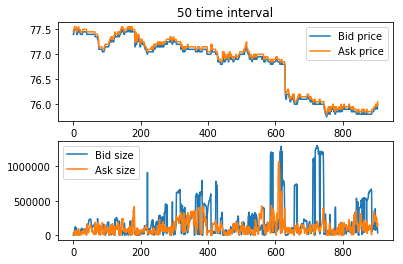

In [56]:
# This module print the Bid & Ask price, Bid & Ask size
def plot_trend(Data, tag):
    fig, axs = plt.subplots(2,1)
    n = Data.shape[0]
    d = Data.shape[1]
    time = np.linspace(0,n,n)
    BidP = Data[:,0]
    Askp = Data[:,2]
    Bidsize = Data[:,1]
    Asksize = Data[:,3]
    
    ax = axs[0]
    ax.plot(time,BidP,label='Bid price')
    ax.plot(time,Askp,label='Ask price')
    ax.legend()
    ax.set_title(tag)
    ax = axs[1]
    ax.plot(time,Bidsize,label='Bid size')
    ax.plot(time,Asksize,label='Ask size')
    ax.legend()
    plt.show()
    
# plot the whole trend   
plot_trend(Data,'whole')

# plot with 20 time slot
interval = 20
index = np.arange(0,n,interval)
plot_trend(Data[index,:],str(interval)+' time interval')

# plot with 100 time slot
interval = 30
index = np.arange(0,n,interval)
plot_trend(Data[index,:],str(interval)+' time interval')

# plot with 200 time slot
interval = 50
index = np.arange(0,n,interval)
plot_trend(Data[index,:],str(interval)+' time interval')

# in order to lower the frequency, I choose the plot with the biggest time slot interval while the infomation is not lost. 
### one can notice in the 50-time_slot plot we already lost a bunch of information, like in the first 200 time unit, the it can not capture all the fluctuation. 
# I choose 30 time interval as the sample frequency. However, this is based on the assumption that the original data set is sampled about the same frequency within each minute. The practice data set is not exactly samppled with the same frequency. But since the total data is of about the same size. I suppose the sample fequency difference is insiginificant. Or we can say that we just model based on the obbsevation frequency, instead of model on the real time.

# Notice there is a $\color{red}{dramatic\ drop}$ in the plot.

In [57]:
# reconstruct the Data matrix with 30 interval
interval = 30
index = np.arange(0,n,interval)
Data_30 = Data[index,:]


# II: The following code is to detact if this dramatic drop is due to some market operations rather than the real stock price fluctuation.

In [9]:
# Find the dramatic drop
big_drop = np.where(BidP < 76.5)[0][0]
print('the big drop happens at time slot:',big_drop)
print(BidP[big_drop-4:big_drop+5])

NameError: name 'BidP' is not defined

In [21]:
a = np.arange(0,99,5)
print(a)

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [22]:
len(Data)

45164

In [2]:
class window_model:
    def __init__(self, Data):
        self.Data = Data
        self.bid_price = Data[:,0]
        self.ask_price = Data[:,2]
        self.bid_size = Data[:,1]
        self.ask_size = Data[:,3]
    def drop_detect(self):
        big_drop = np.where(BidP < 76.5)[0][0]
        print('the big drop happens at time slot:',big_drop)
        print(BidP[big_drop-4:big_drop+5])
        
        
    